# Automated Paddy Flooding Detection

In [2]:
!pip install rasterio rasterstats fiona geopandas geemap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.1 MB/s eta 0:00:00


In [4]:
using_colab = True
if using_colab:
  from google.colab import drive
  drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#@title updated - Process the images and extract flooded areas

#if using colab
using_colab = True
if using_colab:
  from google.colab import drive
  drive.mount ('/content/drive', force_remount=True)

import os
from rasterio.plot import show
import matplotlib.pyplot as plt
import geemap.colormaps as cm
import ee
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from datetime import datetime, date, timedelta
from matplotlib.dates import DateFormatter, DayLocator
os.chdir('/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow')
from datetime import datetime
from IPython.display import display
import geemap
from branca.colormap import LinearColormap
import pandas as pd
import altair as alt
import numpy as np
import folium
import geemap.foliumap as geema
from geemap.basemaps import GoogleMapsTileProvider
from tqdm import tqdm

from sentinel2_flooding_detection import *

year = '2025'
# Define the date range for processing
start_date = '2025-01-21'
end_date = '2025-02-23'
# Process flooding data and create DataFrame for analysis
floode_area = run_detection_flooding(aoi= dagana, grid=grid, start_date=start_date, end_date=end_date, year=year)

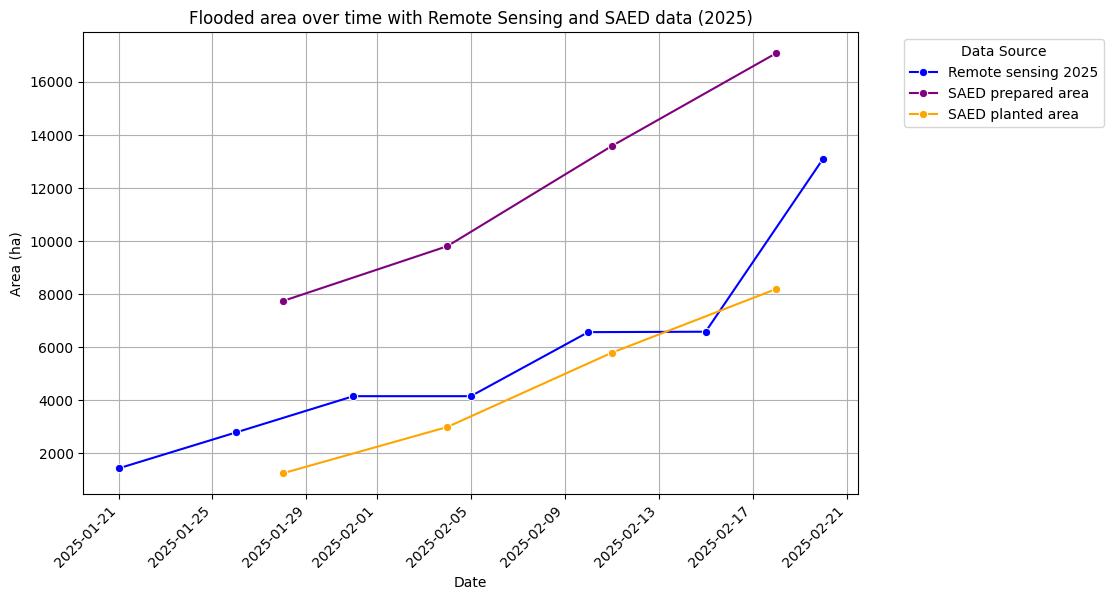

In [11]:
saed_2025_dhs = pd.read_csv("/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/SAED_WeeklyBulletins/2025/saed_2025.csv")
saed_2025_dhs['date'] = pd.to_datetime(saed_2025_dhs['Date'])

# Process MNDWI data for 2025
rs_mndwi_data_2025 = pd.read_csv('/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/new_flow/floodingData_2025.csv')
rs_hueristics_dff_2025 = rs_mndwi_data_2025.filter(regex=('\\d{4}-?\\d{2}-?\\d{2}$'))
area_rs_25 = rs_hueristics_dff_2025.sum(axis=0)
rs_df_25 = pd.DataFrame()
rs_df_25['Date'] = list(area_rs_25.index)
rs_df_25['Area(ha)'] = list(area_rs_25.values)
rs_df_25['Data_source'] = 'Remote sensing 2025'
rs_df_25['date'] = pd.to_datetime(rs_df_25['Date'])

# Combine dataframes for 2025
combined_df_2025 = pd.concat([rs_df_25, saed_2025_dhs])
combined_df_2025['Day'] = combined_df_2025['date'].dt.day
combined_df_2025['Month'] = combined_df_2025['date'].dt.month
combined_df_2025['Year'] = combined_df_2025['date'].dt.year
combined_df_2025['Days'] = combined_df_2025['date'].dt.dayofyear

# Define a consistent color palette for all data sources
palette = {
    'Remote sensing 2025': 'blue',
    'SAED prepared area': 'purple',
    'SAED planted area': 'orange'
}

# Plotting
#fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
plt.figure(figsize=(10, 6))

# Plot for 2025
sns.lineplot(data=combined_df_2025, x='date', y='Area(ha)', hue='Data_source', marker='o', palette=palette)
plt.title('Flooded area over time with Remote Sensing and SAED data (2025)')
plt.xlabel('Date')
plt.ylabel('Area (ha)')
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the rotated text
#plt.tight_layout()
plt.show()


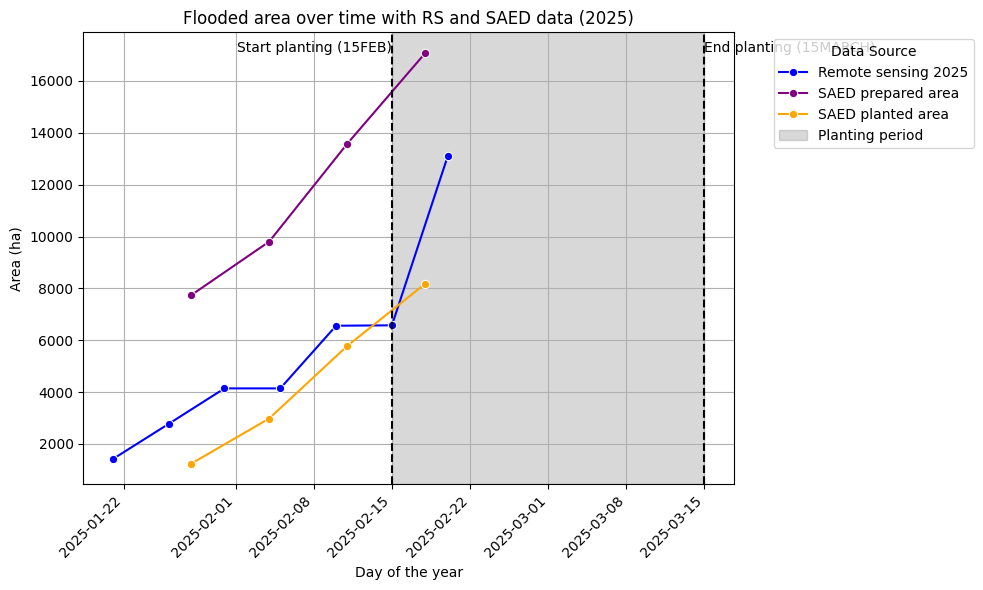

In [12]:
#another way
# Define the start and end dates for vertical lines
start_date = datetime.strptime('2025-02-15', '%Y-%m-%d')#.timetuple().tm_yday
end_date = datetime.strptime('2025-03-15', '%Y-%m-%d')#.timetuple().tm_yday

# Create single plot
plt.figure(figsize=(10, 6))

# Plot the data
sns.lineplot(data=combined_df_2025, x='date', y='Area(ha)', hue='Data_source', marker='o', palette=palette)
plt.title('Flooded area over time with RS and SAED data (2025)')
plt.xlabel('Day of the year')
plt.ylabel('Area (ha)')

# Add shaded area between start and end dates
plt.axvspan(start_date, end_date, color='grey', alpha=0.3, label='Planting period')

# Add vertical lines
plt.axvline(start_date, color='black', linestyle='--')
plt.axvline(end_date, color='black', linestyle='--')

# Add labels for the vertical lines
plt.text(start_date, 17000, 'Start planting (15FEB)', ha='right', va='bottom', color='black')
plt.text(end_date, 17000, 'End planting (15MARCH)', ha='left', va='bottom', color='black')

# Adjust legend
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # ha='right' aligns the rotated text

plt.tight_layout()
plt.show()

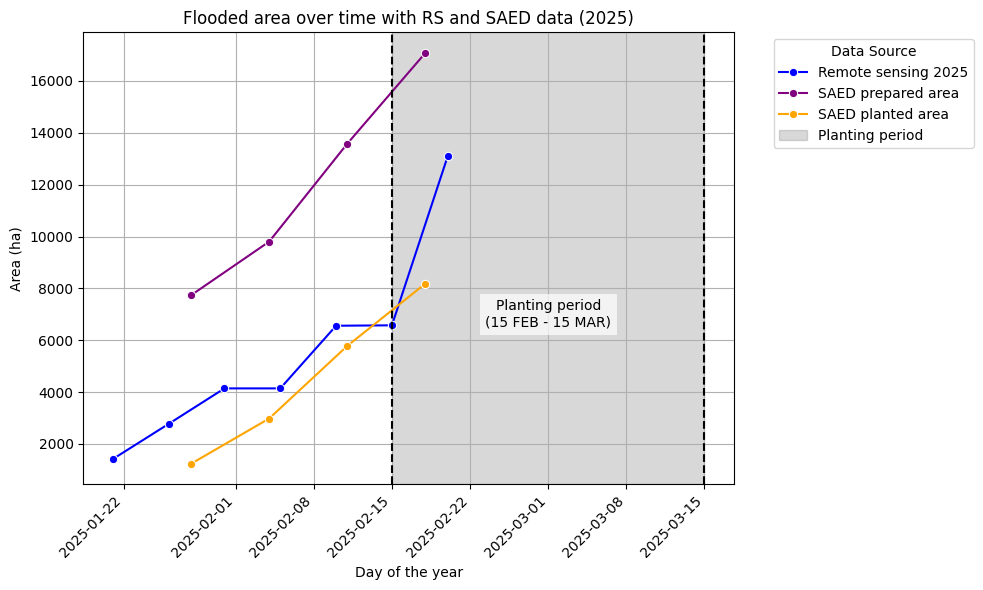

In [13]:
# Define the start and end dates for vertical lines
start_date = datetime.strptime('2025-02-15', '%Y-%m-%d')
end_date = datetime.strptime('2025-03-15', '%Y-%m-%d')

# Create single plot
plt.figure(figsize=(10, 6))

# Plot the data
sns.lineplot(data=combined_df_2025, x='date', y='Area(ha)', hue='Data_source', marker='o', palette=palette)
plt.title('Flooded area over time with RS and SAED data (2025)')
plt.xlabel('Day of the year')
plt.ylabel('Area (ha)')

# Add shaded area between start and end dates
plt.axvspan(start_date, end_date, color='grey', alpha=0.3, label='Planting period')

# Add vertical lines
plt.axvline(start_date, color='black', linestyle='--')
plt.axvline(end_date, color='black', linestyle='--')

# Calculate the middle point for the text
middle_date = start_date + (end_date - start_date)/2
# Add label in the middle of the shaded area
plt.text(middle_date, 7000, 'Planting period\n(15 FEB - 15 MAR)',
         ha='center', va='center', color='black',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adjust legend
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

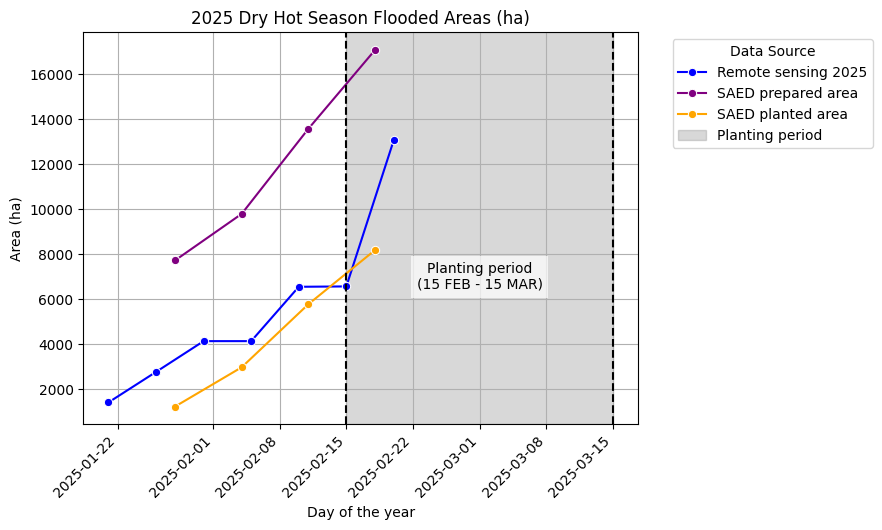

<Figure size 640x480 with 0 Axes>

In [14]:
# Set the figure size factor
scale_factor = 18/2

# Set the figure parameters
plt.rcParams['figure.figsize'] = (scale_factor, scale_factor * 0.6)  # maintains aspect ratio

# Define the start and end dates for vertical lines
start_date = datetime.strptime('2025-02-15', '%Y-%m-%d')
end_date = datetime.strptime('2025-03-15', '%Y-%m-%d')

# Create single plot
# plt.figure(figsize=(10, 6))  # Remove this as we're using rcParams

# Plot the data
sns.lineplot(data=combined_df_2025, x='date', y='Area(ha)', hue='Data_source', marker='o', palette=palette)
plt.title('2025 Dry Hot Season Flooded Areas (ha)')
plt.xlabel('Day of the year')
plt.ylabel('Area (ha)')

# Add shaded area between start and end dates
plt.axvspan(start_date, end_date, color='grey', alpha=0.3, label='Planting period')

# Add vertical lines
plt.axvline(start_date, color='black', linestyle='--')
plt.axvline(end_date, color='black', linestyle='--')

# Calculate the middle point for the text
middle_date = start_date + (end_date - start_date)/2
# Add label in the middle of the shaded area
plt.text(middle_date, 7000, 'Planting period\n(15 FEB - 15 MAR)',
         ha='center', va='center', color='black',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adjust legend
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Reset rcParams to default if needed
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.savefig('flooded_area_20252.png', dpi=300, bbox_inches='tight')
plt.savefig('flooded_area_2025.png')

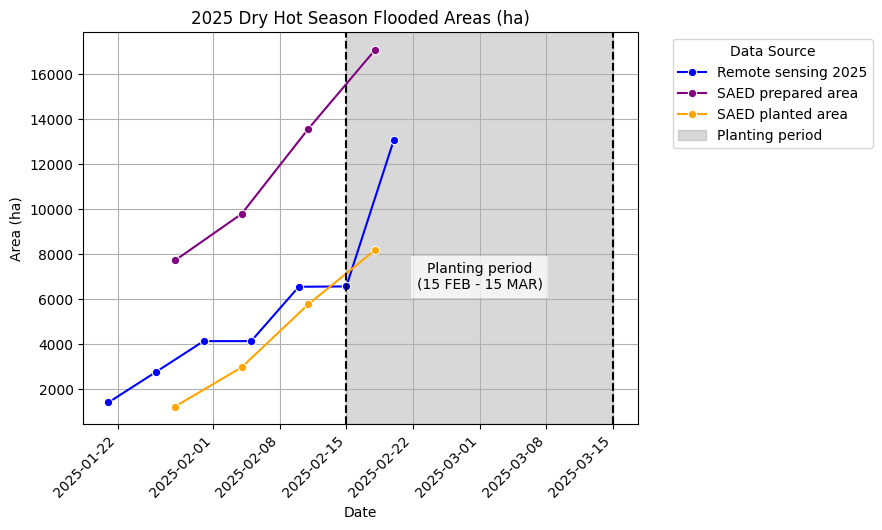

In [16]:
# Set the figure size factor
scale_factor = 18/2

# Set the figure parameters
plt.rcParams['figure.figsize'] = (scale_factor, scale_factor * 0.6)  # maintains aspect ratio

# Define the start and end dates for vertical lines
start_date = datetime.strptime('2025-02-15', '%Y-%m-%d')
end_date = datetime.strptime('2025-03-15', '%Y-%m-%d')

# Create figure and axis
fig, ax = plt.subplots()

# Plot the data
sns.lineplot(data=combined_df_2025, x='date', y='Area(ha)', hue='Data_source', marker='o', palette=palette)
plt.title('2025 Dry Hot Season Flooded Areas (ha)')
plt.xlabel('Date')
plt.ylabel('Area (ha)')

# Add shaded area between start and end dates
plt.axvspan(start_date, end_date, color='grey', alpha=0.3, label='Planting period')

# Add vertical lines
plt.axvline(start_date, color='black', linestyle='--')
plt.axvline(end_date, color='black', linestyle='--')

# Calculate the middle point for the text
middle_date = start_date + (end_date - start_date)/2
# Add label in the middle of the shaded area
plt.text(middle_date, 7000, 'Planting period\n(15 FEB - 15 MAR)',
         ha='center', va='center', color='black',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Adjust legend
plt.legend(title='Data Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Save the figure first
plt.savefig('flooded_area_2025.png', dpi=300, bbox_inches='tight')
plt.savefig('flooded_area_20252.png', dpi=300, bbox_inches='tight')

# Show the plot last
plt.show()

# Reset rcParams to default if needed
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [3]:
saed_25 = pd.read_csv('/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/SAED_WeeklyBulletins/2025/saed_2025.csv')

In [4]:
saed_25

,Date,Area(ha),Data_source
0,"Tuesday, January 28, 2025",7734,SAED prepared area
1,"Tuesday, January 28, 2025",1236,SAED planted area
2,"Tuesday, February 4, 2025",9802,SAED prepared area
3,"Tuesday, February 4, 2025",2981,SAED planted area
4,"Tuesday, February 11, 2025",13579,SAED prepared area
5,"Tuesday, February 11, 2025",5781,SAED planted area
6,"Tuesday, February 18, 2025",17081,SAED prepared area
7,"Tuesday, February 18, 2025",8186,SAED planted area


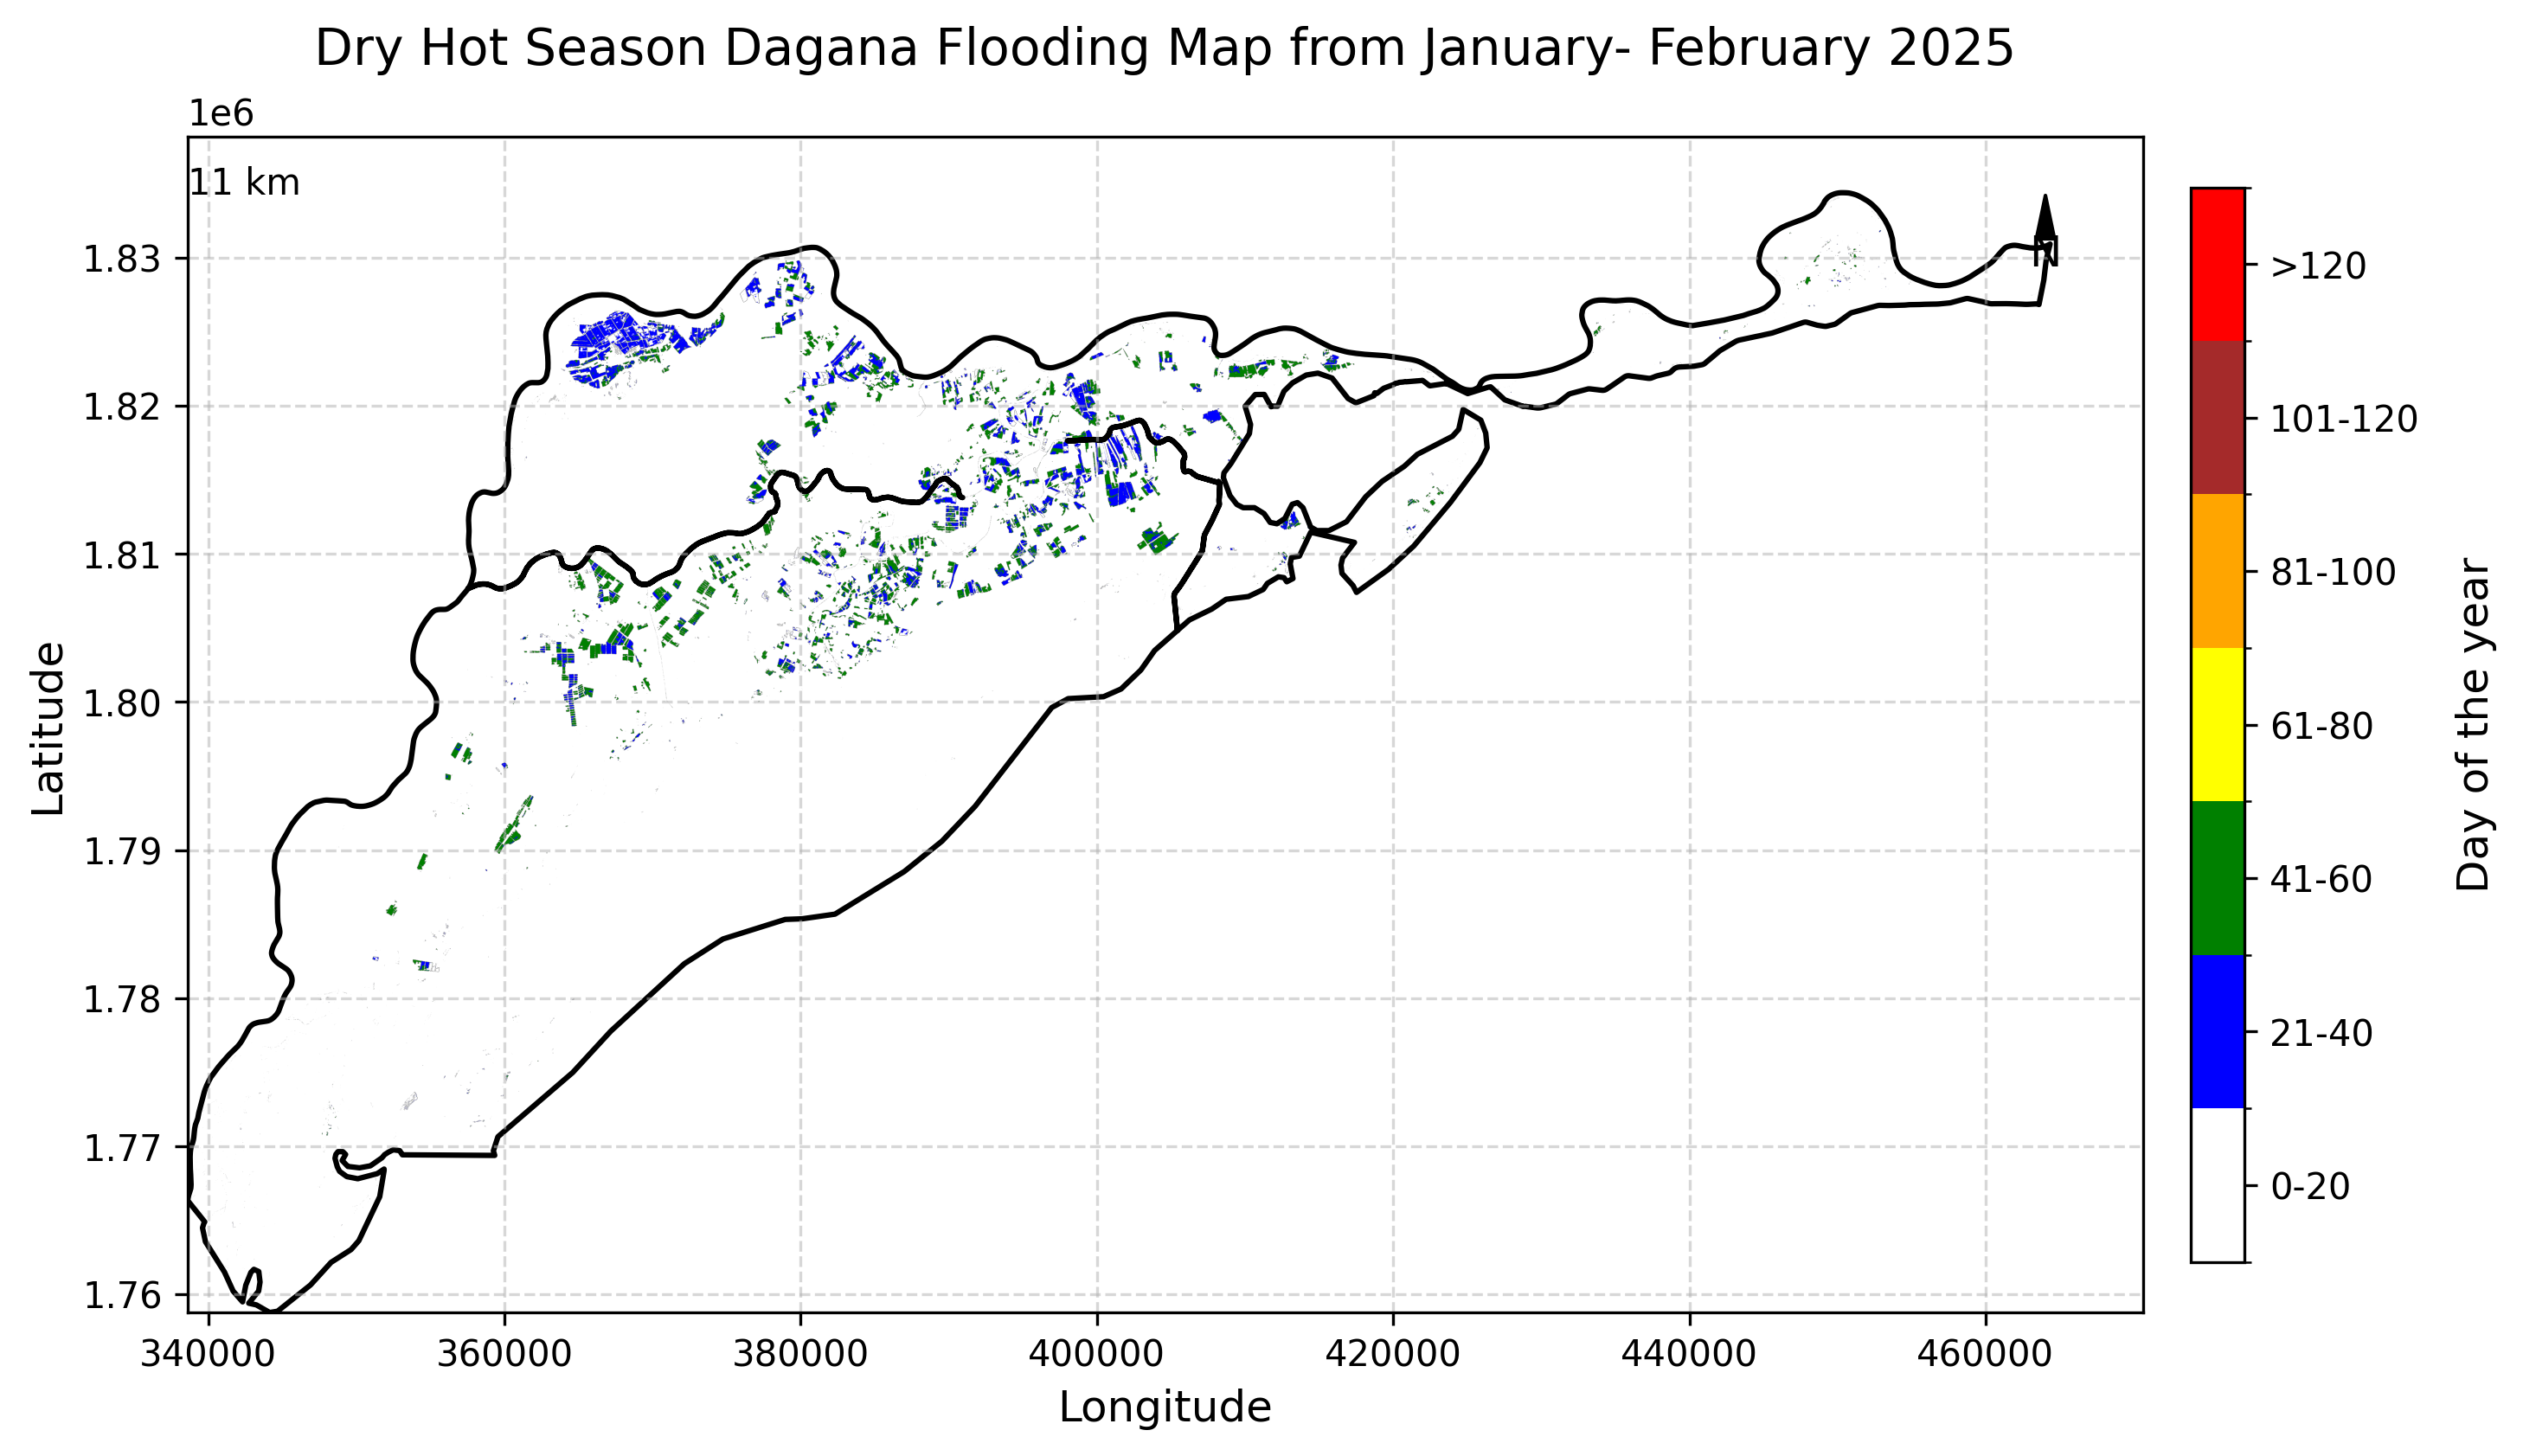

In [21]:
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
from rasterio.plot import show

def create_flooding_map_plot(map_path, boundary_path, title):#, data_source, date_range):
    try:
        with rio.open(map_path) as src:
            mp = src.read(1)
            extent = rio.plot.plotting_extent(src)
            raster_crs = src.crs

            # Define the custom colormap
            colors = ['white', 'blue', 'green', 'yellow', 'orange', 'brown', 'red']

            # Ensure bounds are strictly increasing
            max_val = np.max(mp)
            bounds = [0, 20, 40, 60, 80, 100, 120]
            if max_val > 120:
                bounds.append(max_val + 1)
            else:
                bounds.append(121)

            cmap = ListedColormap(colors)
            norm = BoundaryNorm(bounds, len(colors))

            # Mask values
            masked_mp = np.ma.masked_where((mp == 7) | (mp == 0), mp)

            # Read boundary
            boundary = gpd.read_file(boundary_path)
            if boundary.crs != raster_crs:
                boundary = boundary.to_crs(raster_crs)

            # Create figure
            fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

            # Plot raster
            show(masked_mp, ax=ax, cmap=cmap, norm=norm, extent=extent)
            ax.invert_yaxis()  # Invert y-axis to correct orientation

            # Plot boundary
            boundary.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1.5)

            # Create colorbar
            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array(masked_mp)
            cbar = plt.colorbar(sm, ax=ax, shrink=0.6, pad=0.02)
            cbar.set_label('Day of the year', fontsize=12, labelpad=10)
            cbar.ax.tick_params(labelsize=10)

            # Add custom tick labels
            tick_labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120', f'>{120}']
            cbar.set_ticks(np.array(bounds[:-1]) + np.diff(bounds)/2)
            cbar.set_ticklabels(tick_labels)

            # Set title and labels
            ax.set_title(title, fontsize=14, pad=20)
            ax.set_xlabel('Longitude', fontsize=12)
            ax.set_ylabel('Latitude', fontsize=12)

            # Add north arrow
            x, y, arrow_length = 0.95, 0.95, 0.05
            ax.annotate('N', xy=(x, y), xycoords='axes fraction',
                       xytext=(x, y-arrow_length), textcoords='axes fraction',
                       arrowprops=dict(facecolor='black', width=1, headwidth=5),
                       ha='center', va='center', fontsize=12)

            # Add scale bar
            if hasattr(src, 'res'):
                scale_bar_length_deg = 0.1
                scale_bar_length_km = scale_bar_length_deg * 111
                ax.plot([extent[0] + 0.05, extent[0] + 0.05 + scale_bar_length_deg],
                       [extent[2] + 0.05, extent[2] + 0.05], 'k-', linewidth=2)
                ax.text(extent[0] + 0.05, extent[2] + 0.07,
                       f'{scale_bar_length_km:.0f} km', ha='left', fontsize=10)

            # # Add data source and date range
            # source_text = f"{data_source}\n{date_range}"
            # plt.figtext(0.5, 0.02, source_text, ha='center', fontsize=10,
            #            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=5))

            # Add gridlines
            ax.grid(True, linestyle='--', alpha=0.5)

            # Adjust layout
            plt.tight_layout(rect=[0, 0.05, 1, 0.95])

            # Save plot
            output_filename = f"flooding_map_{title.replace(' ', '_')}.png"
            plt.savefig(output_filename, dpi=300, bbox_inches='tight')

            plt.show()
            plt.close()

    except Exception as e:
        print(f"Error processing map {map_path}: {e}")
        return

# Define paths and metadata
map_paths = [
    #"/content/drive/MyDrive/fis_flooding_maps/Flooding_map_2025-01-31.tif",
    "/content/drive/MyDrive/fis_flooding_maps/Flooding_map_2025-02-21.tif"
]

boundary_path = "/content/drive/MyDrive/Remote_sensing/SRV_flooding_detection_models/Dagana/workflow/Dry_hot_season/dagana_region.geojson"

titles = [
    #'Dagana flooding map S2 MNDWI, January 2025',
    'Dry Hot Season Dagana Flooding Map from January- February 2025'
]

data_sources = [
    #"Data Source: S2 2025 RS Analysis",
    "Data Source: S2 2025 RS Analysis"
]

date_ranges = [
  #  "Date Range: January 21st - February 23rd 2025",
    "Date Range: January 21st - February 23rd 2025"
]

# Generate plots
for map_path, title in zip(map_paths, titles):#, data_sources, date_ranges):, data_source, date_range
    try:
        create_flooding_map_plot(map_path, boundary_path, title)#, data_source, date_range)
    except Exception as e:
        print(f"Error generating plot for {title}: {e}")